# Word Embeddings Visualization

This notebook demonstrates various visualization techniques for word embeddings including:
- Dimensionality reduction (PCA and t-SNE)
- Semantic clustering analysis
- Visualization of word relationships and analogies
- Comparison of different embedding models

## Learning Objectives:
1. Understand how high-dimensional embeddings can be visualized in 2D/3D
2. Observe semantic relationships captured by embeddings
3. Compare PCA vs t-SNE for visualization
4. Analyze how similar words cluster together in embedding space

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import sys

# Add project root to path
project_root = Path.cwd().parent
sys.path.append(str(project_root))

from utils.visualization import (
    plot_embeddings_2d,
    plot_semantic_clusters,
    plot_analogy_visualization,
    plot_similarity_heatmap
)

# For loading pretrained embeddings (optional)
# Try to import pretrained model classes; if they don't exist, show available names and set fallbacks
try:
    from SemanticRepresentations.models import Word2VecModel, GloVeModel
except Exception as e:
    print(f"Could not import Word2VecModel/GloVeModel: {e}")
    # Inspect the module to see what's actually available
    try:
        import importlib
        mod = importlib.import_module('SemanticRepresentations.models')
        available = [name for name in dir(mod) if not name.startswith('_')]
        print("Available names in SemanticRepresentations.models:", available)
    except Exception as inspect_err:
        print("Failed to import/inspect SemanticRepresentations.models:", inspect_err)
    # Provide safe fallbacks so the rest of the notebook can run (use sample embeddings)
    Word2VecModel = None
    GloVeModel = None

# Set random seed for reproducibility
np.random.seed(42)

# Configure matplotlib
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

## 1. Load or Create Word Embeddings

We'll either load pre-trained embeddings from our models or create sample embeddings for demonstration.

In [2]:
# Option 1: Load pre-trained embeddings from your Word2Vec or GloVe models
# Uncomment and modify the path if you have trained models

# model = Word2VecModel.load('path/to/your/model.pkl')
# embeddings_dict = model.word_vectors
# vocabulary = list(embeddings_dict.keys())

# Option 2: Create sample embeddings for demonstration
# This simulates embeddings with semantic structure

def create_sample_embeddings(embedding_dim=50):
    """
    Create sample embeddings with semantic structure.
    Groups: animals, countries, professions, colors, food
    """
    np.random.seed(42)
    
    # Define semantic groups with base vectors
    groups = {
        'animals': ['dog', 'cat', 'lion', 'tiger', 'elephant', 'giraffe', 'horse', 'zebra'],
        'countries': ['france', 'germany', 'italy', 'spain', 'japan', 'china', 'india', 'brazil'],
        'professions': ['doctor', 'teacher', 'engineer', 'lawyer', 'nurse', 'chef', 'pilot', 'scientist'],
        'colors': ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'black', 'white'],
        'food': ['apple', 'banana', 'pizza', 'burger', 'rice', 'bread', 'cheese', 'pasta']
    }
    
    embeddings_dict = {}
    
    # Create base vectors for each group
    for group_idx, (group_name, words) in enumerate(groups.items()):
        # Create a base vector for this semantic group
        base_vector = np.random.randn(embedding_dim) * 2
        
        for word in words:
            # Add noise to base vector to create individual word embeddings
            noise = np.random.randn(embedding_dim) * 0.5
            embeddings_dict[word] = base_vector + noise
    
    # Normalize embeddings
    for word in embeddings_dict:
        embeddings_dict[word] = embeddings_dict[word] / np.linalg.norm(embeddings_dict[word])
    
    return embeddings_dict, groups

# Create embeddings
embeddings_dict, semantic_groups = create_sample_embeddings(embedding_dim=100)
vocabulary = list(embeddings_dict.keys())

print(f"Created embeddings for {len(vocabulary)} words")
print(f"Embedding dimension: {embeddings_dict[vocabulary[0]].shape[0]}")
print(f"\nSemantic groups: {list(semantic_groups.keys())}")

Created embeddings for 40 words
Embedding dimension: 100

Semantic groups: ['animals', 'countries', 'professions', 'colors', 'food']


## 2. Basic Embedding Visualization with PCA

PCA (Principal Component Analysis) is a linear dimensionality reduction technique that finds the directions of maximum variance in the data.

In [3]:
# Convert embeddings dict to arrays
words = list(embeddings_dict.keys())
embeddings = np.array([embeddings_dict[w] for w in words])

print(f"Embeddings shape: {embeddings.shape}")
print(f"Words to visualize: {len(words)}")

Embeddings shape: (40, 100)
Words to visualize: 40


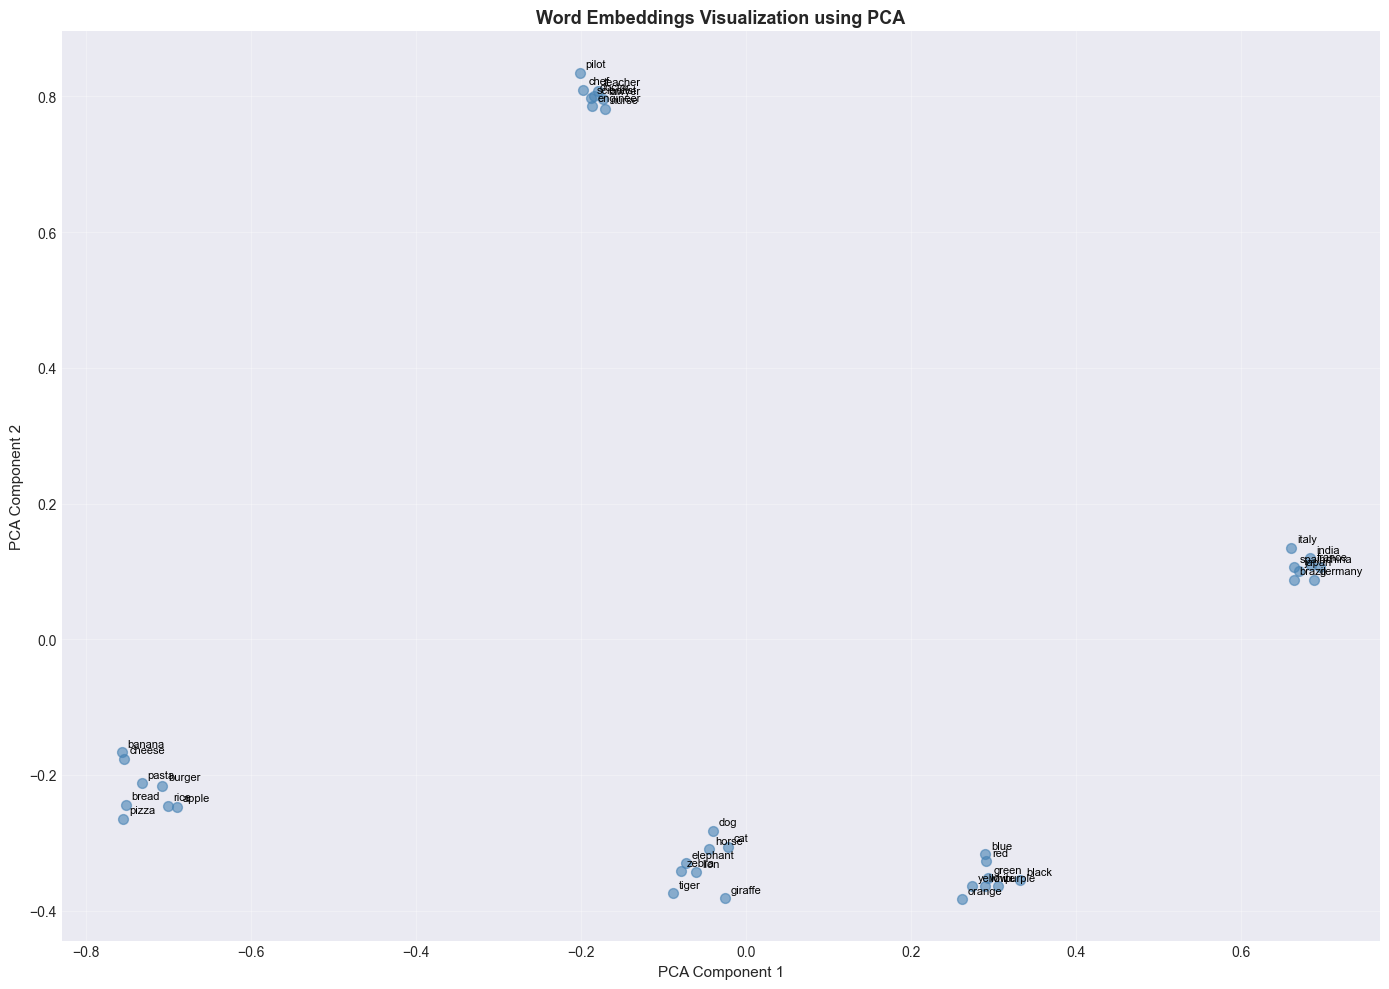

In [4]:
# Visualize all embeddings using PCA
fig = plot_embeddings_2d(
    embeddings=embeddings,
    words=words,
    method='pca',
    figsize=(14, 10),
    title='Word Embeddings Visualization using PCA'
)
plt.show()

### Observations:
- PCA preserves global structure and is computationally efficient
- Words with similar meanings should appear closer together
- The first two components capture the most variance in the data

## 3. t-SNE Visualization

t-SNE (t-Distributed Stochastic Neighbor Embedding) is a non-linear technique that's better at preserving local neighborhood structure.

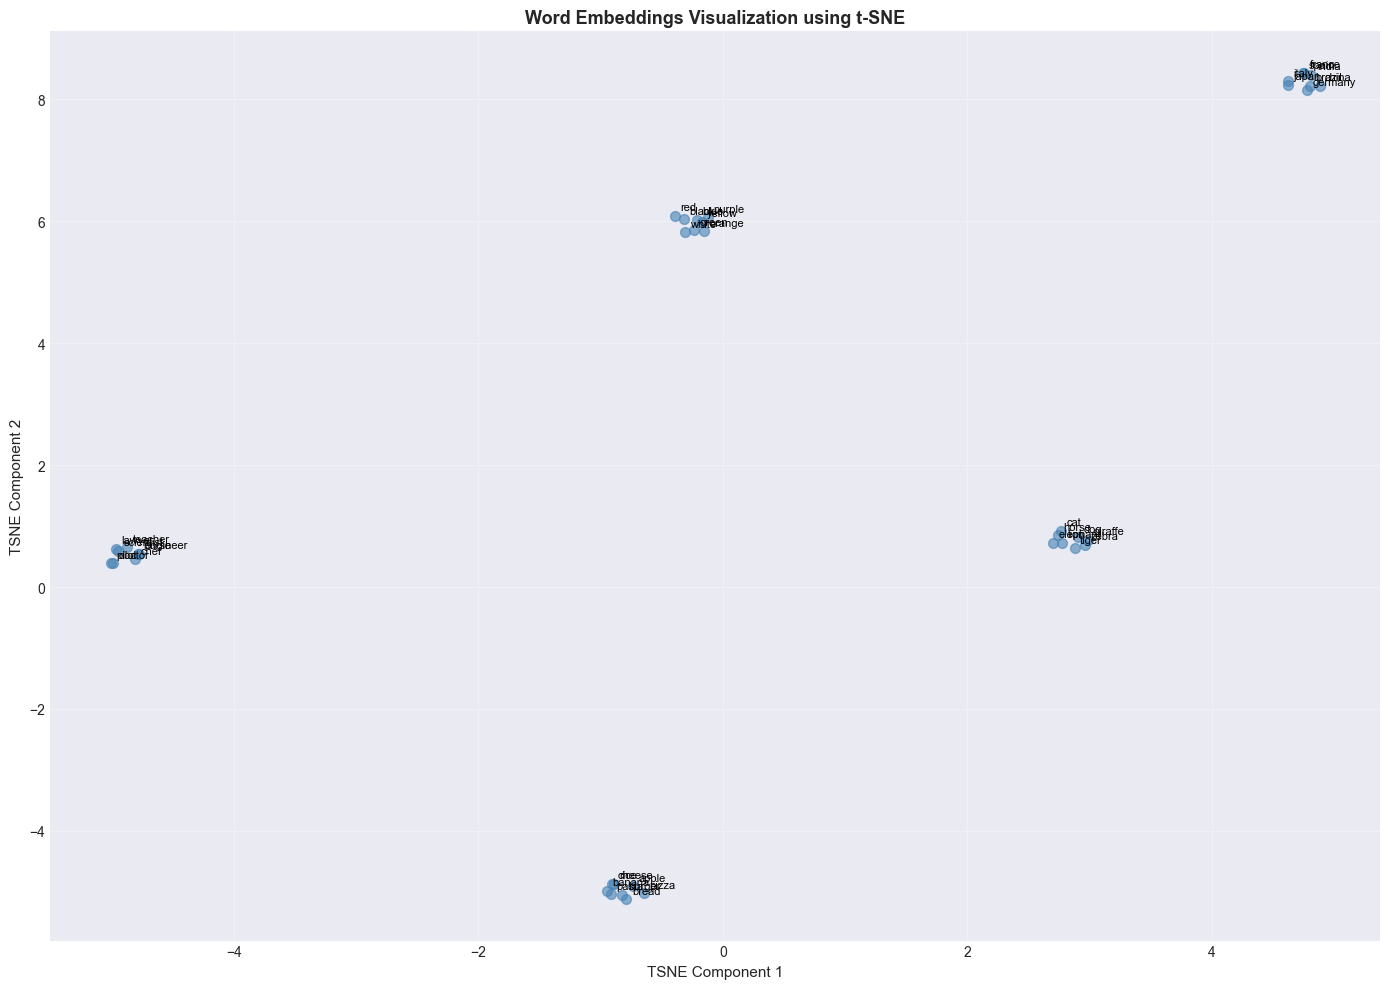

In [5]:
# Visualize embeddings using t-SNE
fig = plot_embeddings_2d(
    embeddings=embeddings,
    words=words,
    method='tsne',
    perplexity=10,  # Adjust based on dataset size (5-50 is typical)
    n_iter=1000,
    figsize=(14, 10),
    title='Word Embeddings Visualization using t-SNE'
)
plt.show()

### Observations:
- t-SNE often creates tighter, more distinct clusters than PCA
- Better at revealing local structure and semantic groupings
- Note: t-SNE can be sensitive to hyperparameters (especially perplexity)

## 4. Semantic Clustering Visualization

Let's visualize embeddings with different colors for each semantic category to see if the embeddings capture semantic similarity.

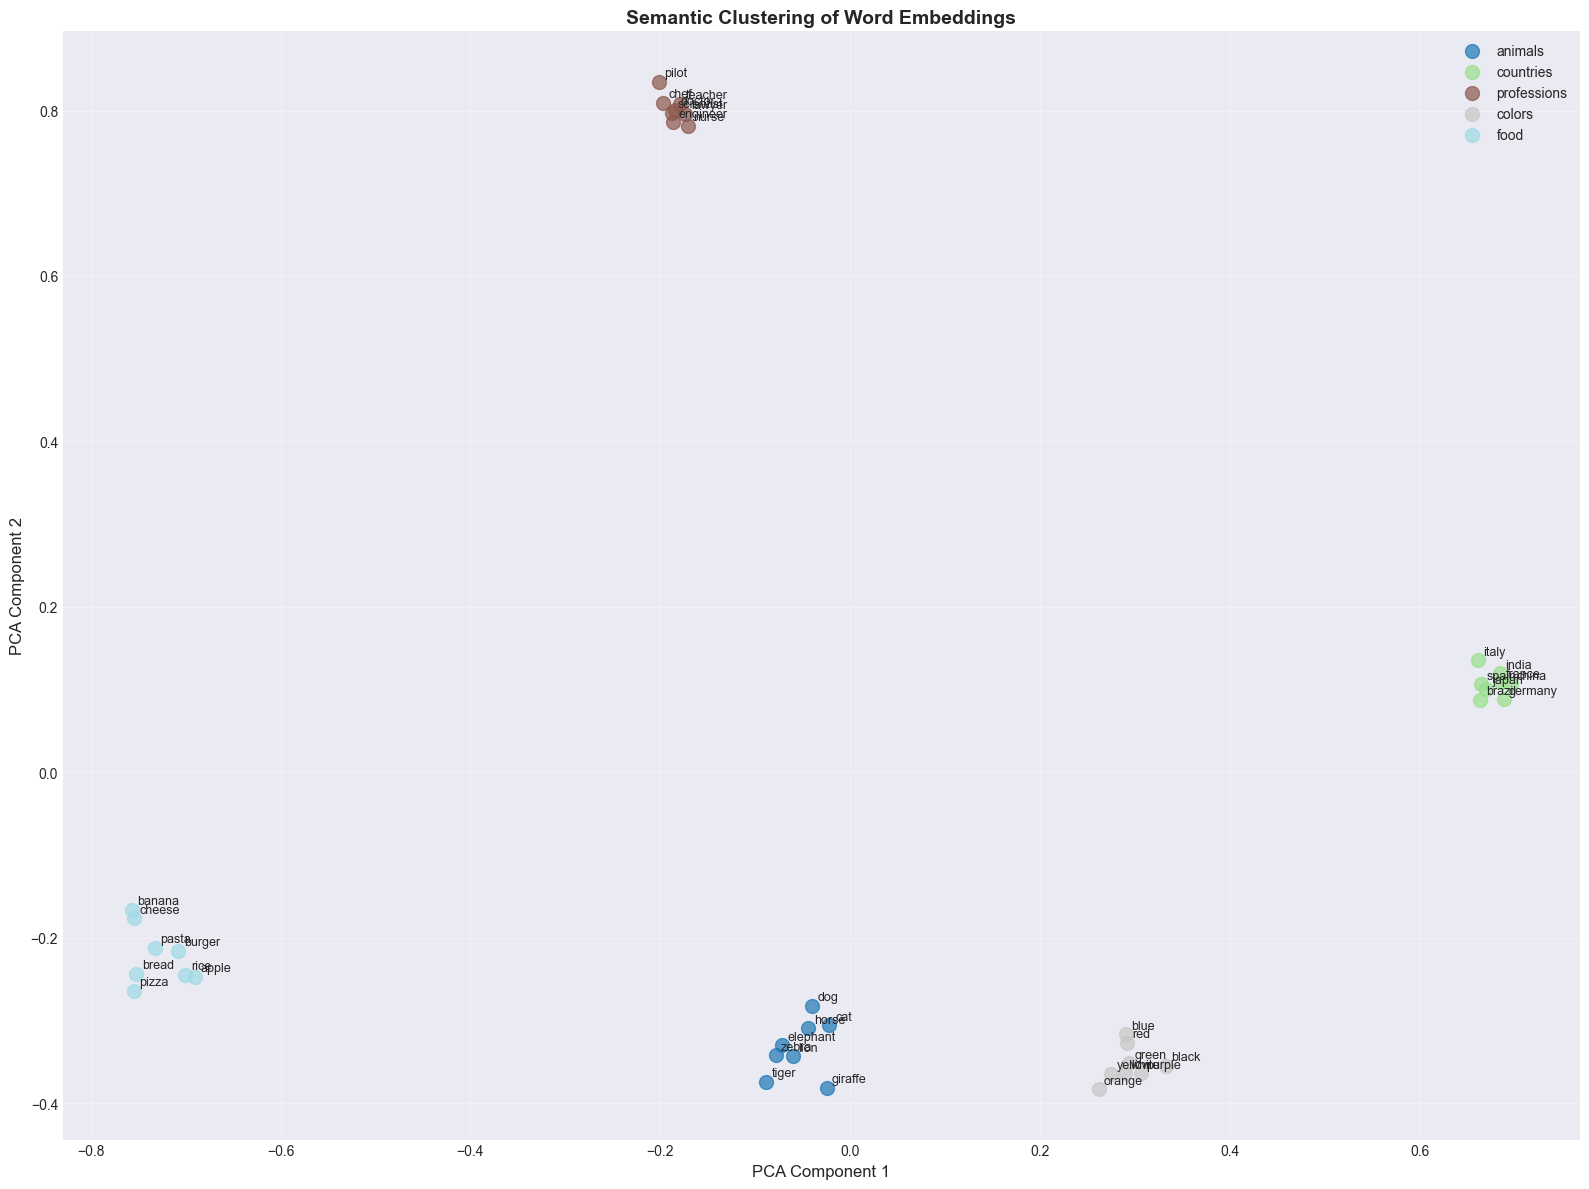

In [6]:
# Visualize semantic clusters with PCA
fig = plot_semantic_clusters(
    embeddings=embeddings,
    words=words,
    categories=semantic_groups,
    method='pca',
    figsize=(16, 12)
)
plt.show()

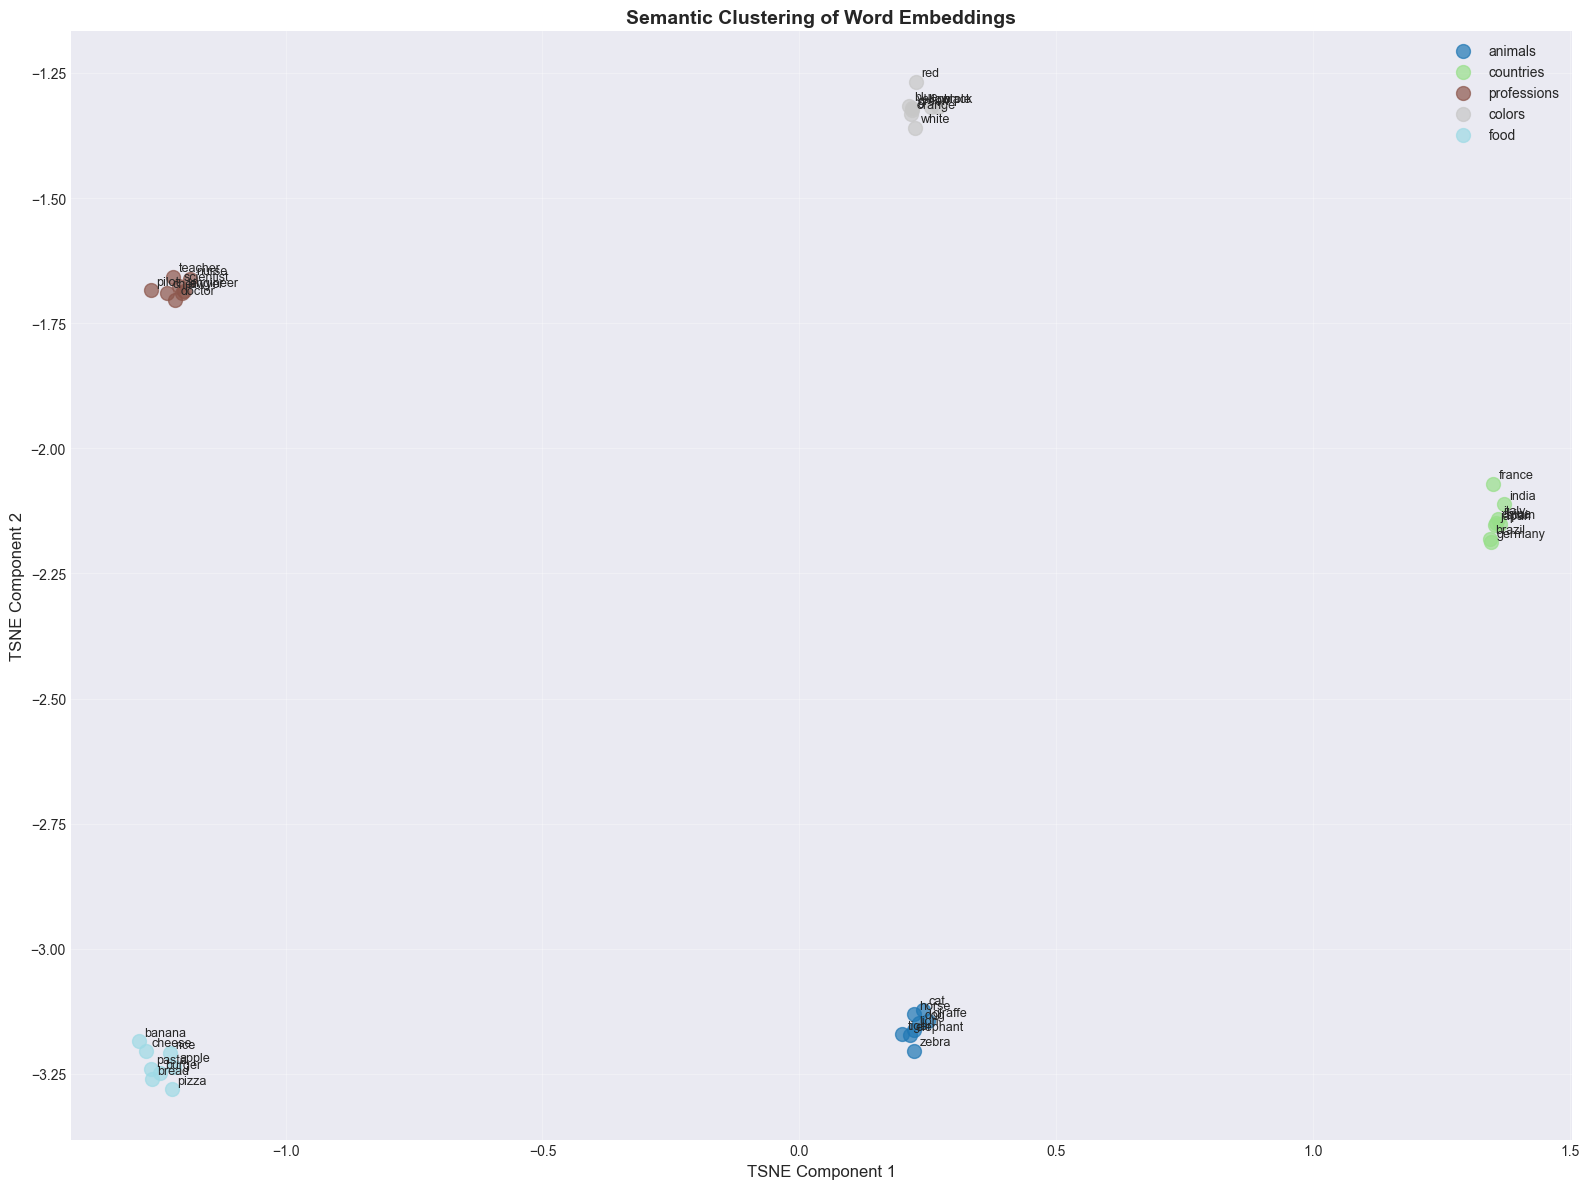

In [7]:
# Visualize semantic clusters with t-SNE
fig = plot_semantic_clusters(
    embeddings=embeddings,
    words=words,
    categories=semantic_groups,
    method='tsne',
    figsize=(16, 12)
)
plt.show()

### Analysis:
- Words in the same semantic category should cluster together
- The distance between clusters reflects semantic relationships
- Good embeddings will show clear separation between different categories

## 5. Highlighting Specific Words

Focus on specific words of interest to understand their relationships.

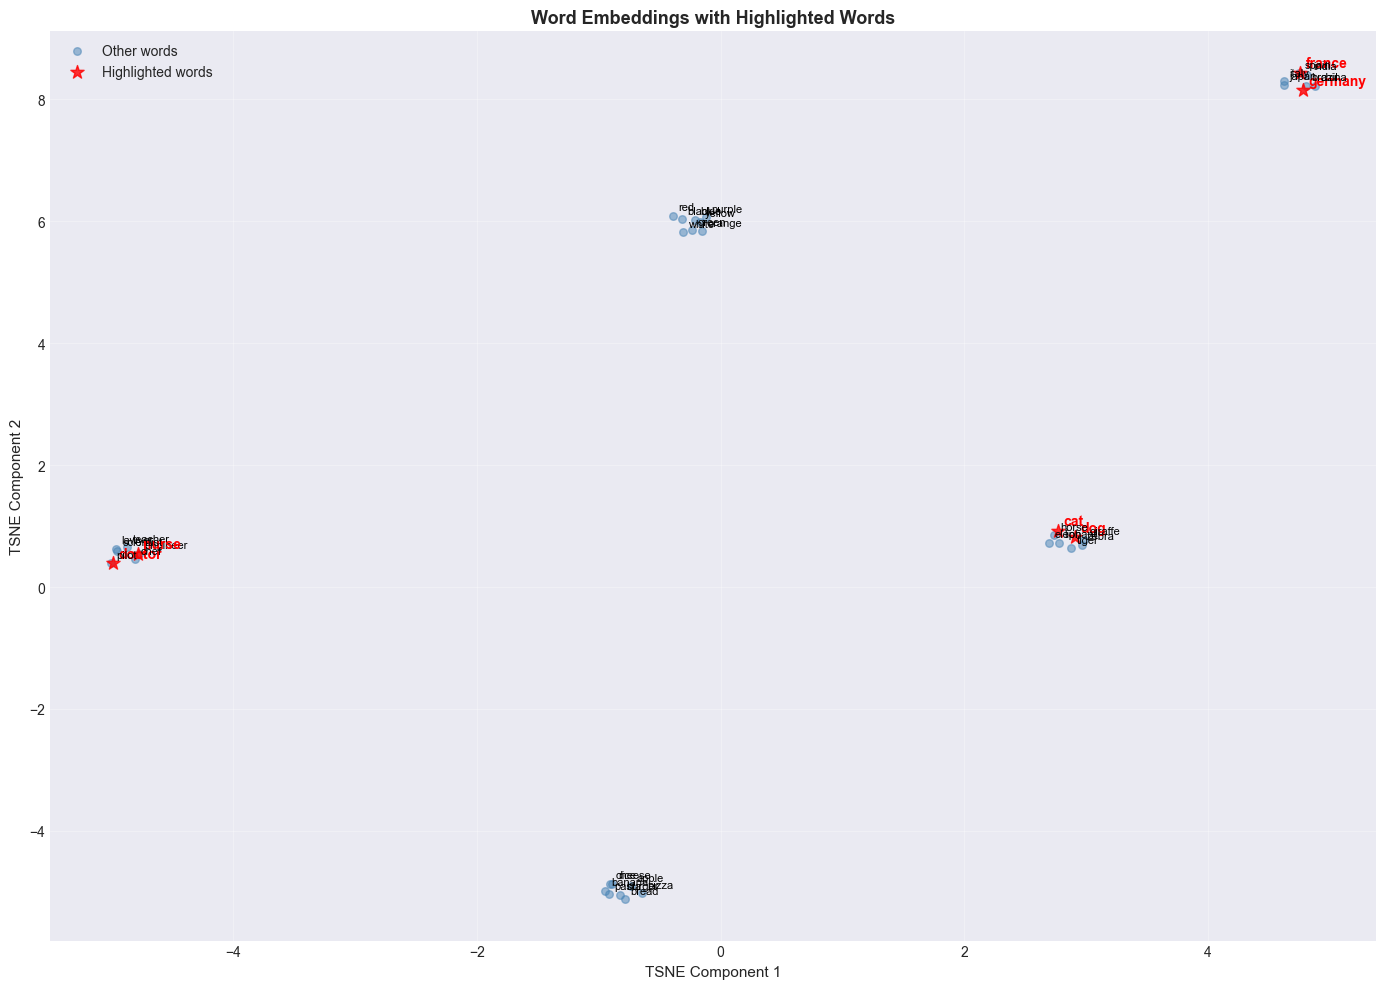

In [8]:
# Highlight specific words to analyze their relationships
highlight_words = ['dog', 'cat', 'france', 'germany', 'doctor', 'nurse']

fig = plot_embeddings_2d(
    embeddings=embeddings,
    words=words,
    method='tsne',
    perplexity=10,
    highlight_words=highlight_words,
    figsize=(14, 10),
    title='Word Embeddings with Highlighted Words'
)
plt.show()

## 6. Word Analogy Visualization

Visualize word analogies to show vector arithmetic in embedding space.

Example: "king" - "man" + "woman" ≈ "queen"

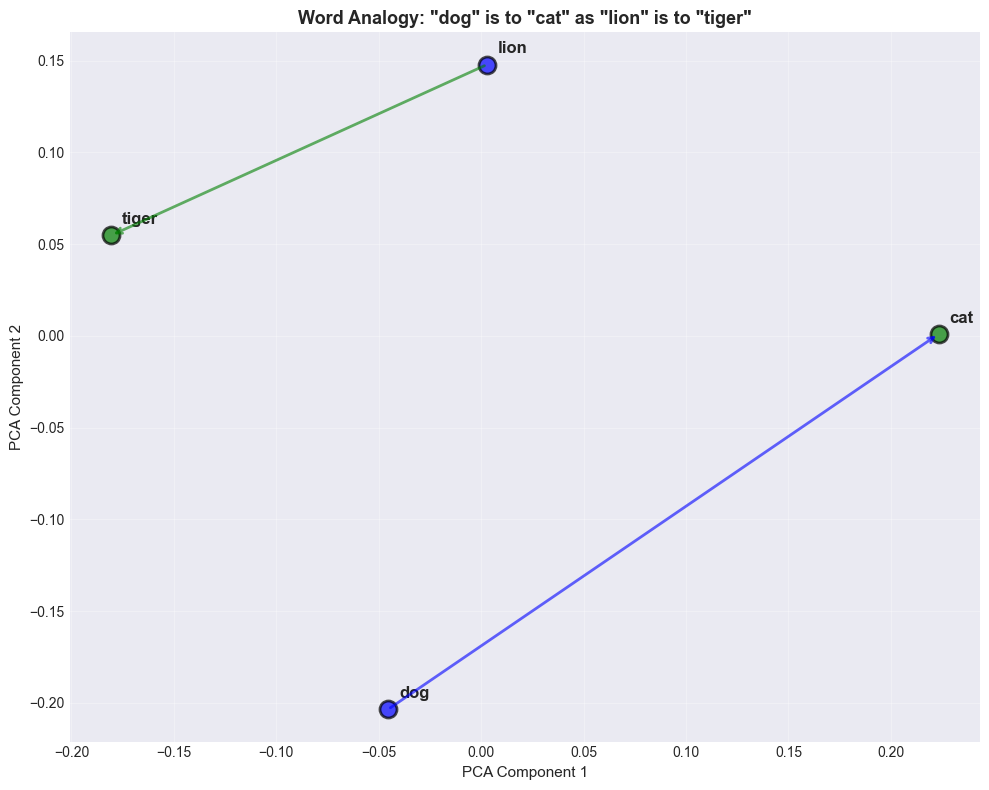

In [9]:
# Visualize word analogies
# Example: dog is to cat as lion is to tiger

fig = plot_analogy_visualization(
    word_a='dog',
    word_b='cat',
    word_c='lion',
    word_d='tiger',
    embeddings_dict=embeddings_dict,
    method='pca',
    figsize=(10, 8)
)
plt.show()

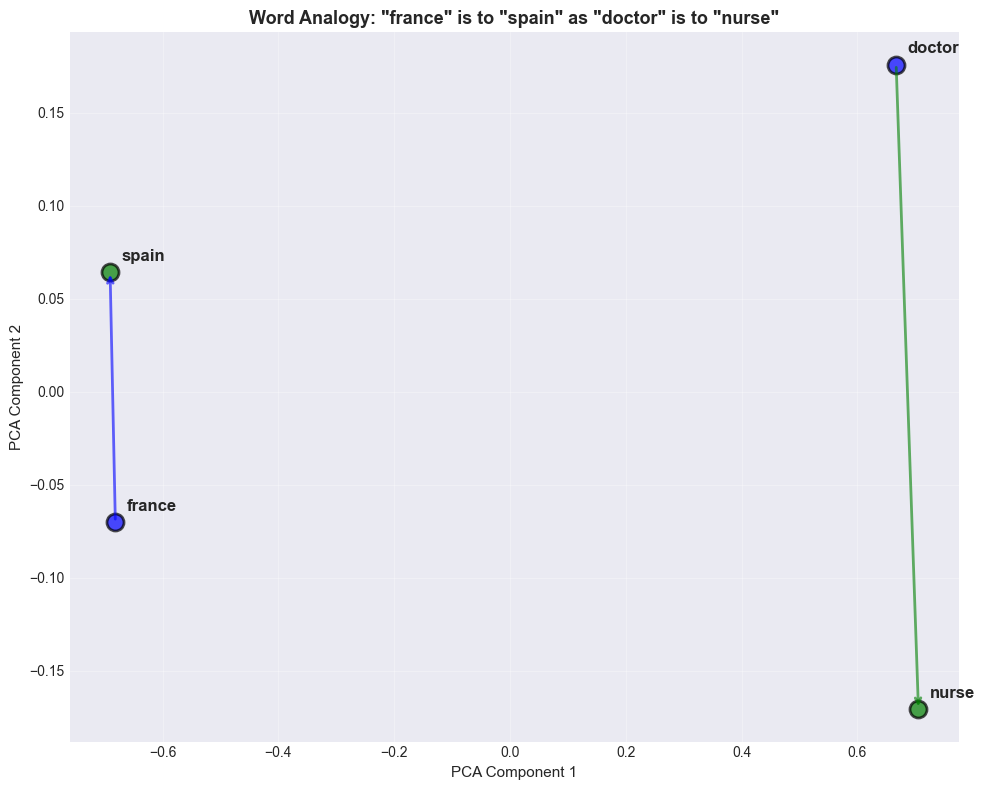

In [10]:
# Another analogy: france is to paris as germany is to berlin
# (Note: You'd need to add capital cities to the vocabulary for this)

fig = plot_analogy_visualization(
    word_a='france',
    word_b='spain',
    word_c='doctor',
    word_d='nurse',
    embeddings_dict=embeddings_dict,
    method='pca',
    figsize=(10, 8)
)
plt.show()

## 7. Computing and Visualizing Word Similarities

Calculate cosine similarity between words and visualize as a heatmap.

In [11]:
def cosine_similarity(vec1, vec2):
    """Calculate cosine similarity between two vectors."""
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

# Select a subset of words for similarity analysis
selected_words = ['dog', 'cat', 'lion', 'tiger', 'doctor', 'nurse', 'france', 'germany']
selected_embeddings = [embeddings_dict[w] for w in selected_words]

# Compute similarity matrix
n = len(selected_words)
similarity_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        similarity_matrix[i, j] = cosine_similarity(
            selected_embeddings[i],
            selected_embeddings[j]
        )

print("Similarity Matrix:")
print(similarity_matrix)

Similarity Matrix:
[[ 1.          0.93012967  0.93436472  0.9381143   0.05735893  0.09741806
   0.01187436  0.11270946]
 [ 0.93012967  1.          0.93748203  0.91628781  0.0500994   0.08607651
   0.0327778   0.13222791]
 [ 0.93436472  0.93748203  1.          0.94213994  0.01380325  0.05363381
  -0.00779436  0.0931617 ]
 [ 0.9381143   0.91628781  0.94213994  1.         -0.0062189   0.03008319
  -0.05120911  0.03812093]
 [ 0.05735893  0.0500994   0.01380325 -0.0062189   1.          0.93209576
   0.05656878  0.04499424]
 [ 0.09741806  0.08607651  0.05363381  0.03008319  0.93209576  1.
   0.01098203  0.00226205]
 [ 0.01187436  0.0327778  -0.00779436 -0.05120911  0.05656878  0.01098203
   1.          0.9261861 ]
 [ 0.11270946  0.13222791  0.0931617   0.03812093  0.04499424  0.00226205
   0.9261861   1.        ]]


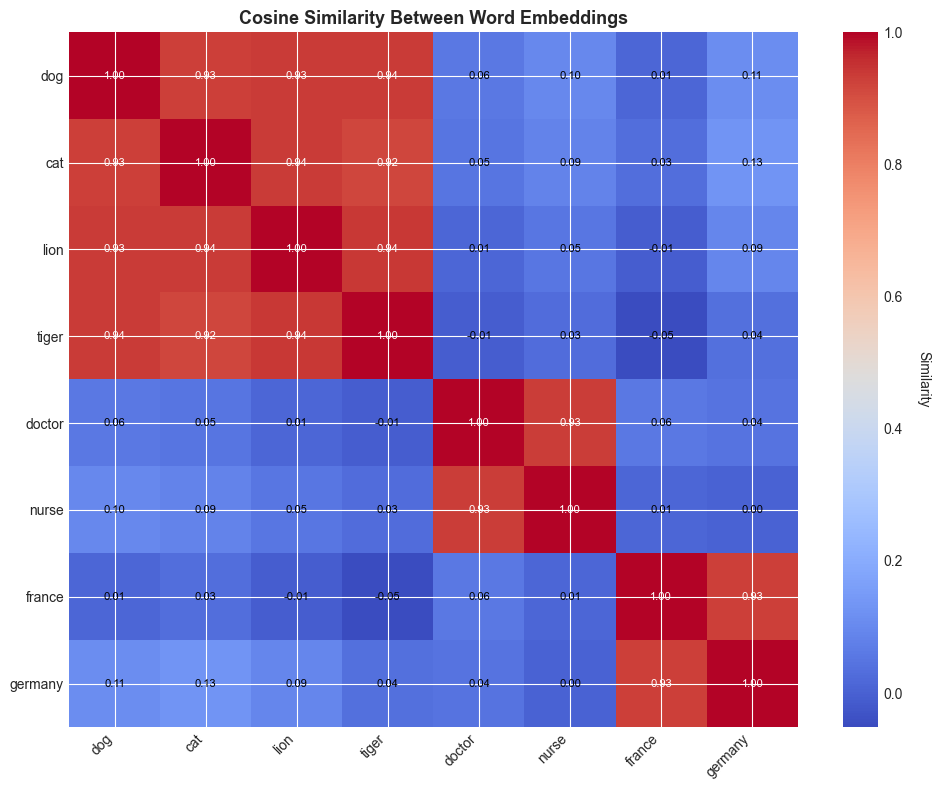

In [12]:
# Visualize similarity matrix
fig = plot_similarity_heatmap(
    similarity_matrix=similarity_matrix,
    labels=selected_words,
    figsize=(10, 8),
    title='Cosine Similarity Between Word Embeddings'
)
plt.show()

### Interpretation:
- Diagonal elements are 1.0 (perfect similarity with itself)
- Higher values indicate more similar words
- Words from the same category (e.g., 'dog' and 'cat') should have higher similarity
- Words from different categories should have lower similarity

## 8. Finding Most Similar Words

Given a word, find the most similar words in the embedding space.

In [13]:
def find_most_similar(word, embeddings_dict, top_k=5):
    """
    Find the most similar words to a given word.
    
    Args:
        word: Query word
        embeddings_dict: Dictionary of word embeddings
        top_k: Number of similar words to return
    
    Returns:
        List of (word, similarity_score) tuples
    """
    if word not in embeddings_dict:
        print(f"Word '{word}' not in vocabulary")
        return []
    
    query_vec = embeddings_dict[word]
    similarities = []
    
    for other_word, other_vec in embeddings_dict.items():
        if other_word != word:
            sim = cosine_similarity(query_vec, other_vec)
            similarities.append((other_word, sim))
    
    # Sort by similarity (descending)
    similarities.sort(key=lambda x: x[1], reverse=True)
    
    return similarities[:top_k]

# Test with different words
test_words = ['dog', 'france', 'doctor', 'red']

for word in test_words:
    print(f"\nMost similar to '{word}':")
    similar_words = find_most_similar(word, embeddings_dict, top_k=5)
    for similar_word, score in similar_words:
        print(f"  {similar_word}: {score:.4f}")


Most similar to 'dog':
  zebra: 0.9408
  tiger: 0.9381
  horse: 0.9372
  giraffe: 0.9345
  lion: 0.9344

Most similar to 'france':
  india: 0.9493
  spain: 0.9441
  brazil: 0.9439
  china: 0.9356
  italy: 0.9332

Most similar to 'doctor':
  scientist: 0.9349
  nurse: 0.9321
  pilot: 0.9309
  engineer: 0.9295
  lawyer: 0.9268

Most similar to 'red':
  black: 0.9342
  yellow: 0.9228
  blue: 0.9200
  purple: 0.9164
  green: 0.9126


## 9. Visualizing Neighborhood of a Word

Focus on a specific word and its nearest neighbors.

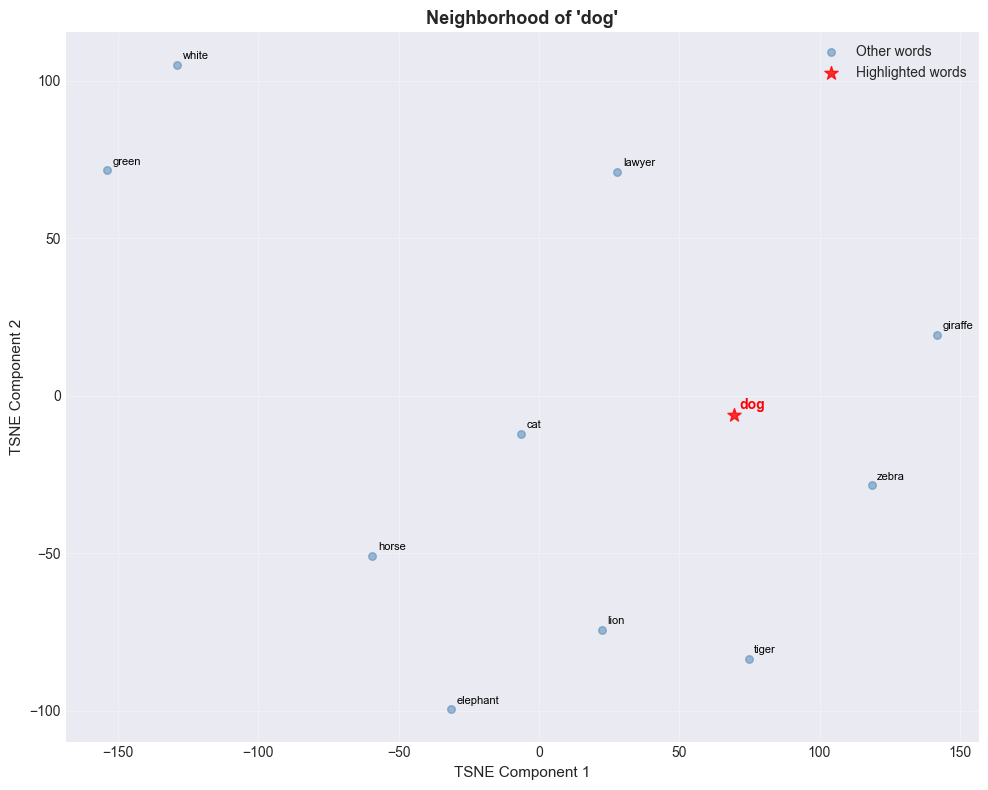

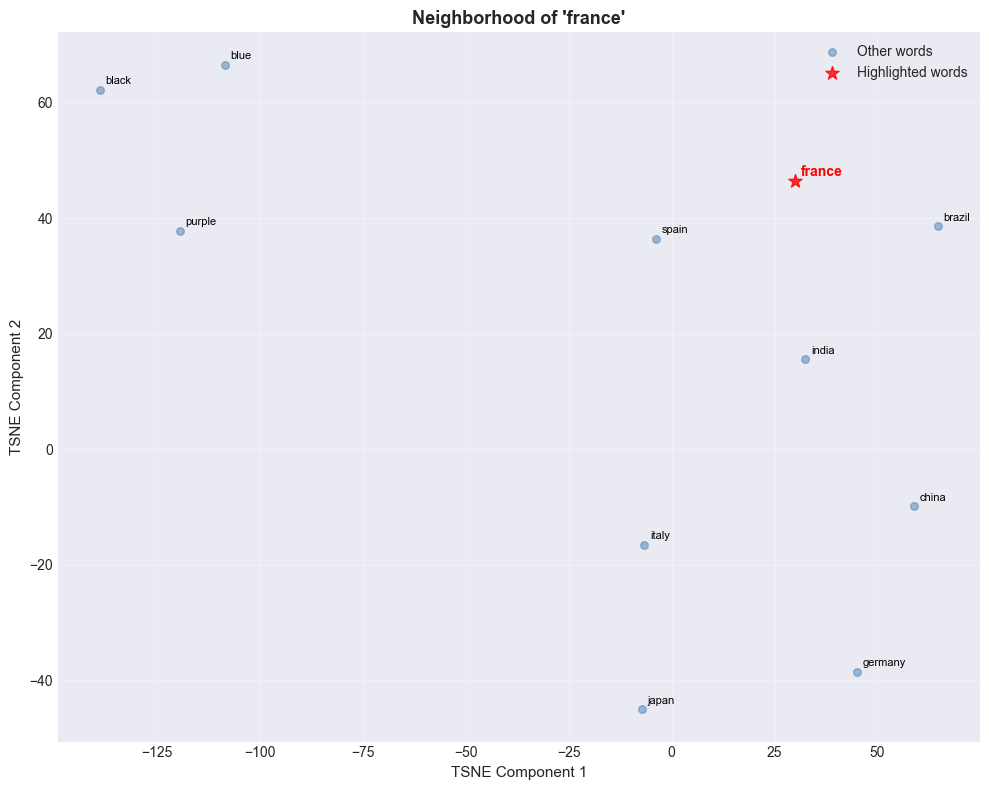

In [14]:
def visualize_word_neighborhood(query_word, embeddings_dict, top_k=10):
    """
    Visualize a word and its nearest neighbors.
    """
    # Find similar words
    similar = find_most_similar(query_word, embeddings_dict, top_k=top_k)
    neighbor_words = [query_word] + [w for w, _ in similar]
    
    # Get embeddings for these words
    neighbor_embeddings = np.array([embeddings_dict[w] for w in neighbor_words])
    
    # Visualize
    fig = plot_embeddings_2d(
        embeddings=neighbor_embeddings,
        words=neighbor_words,
        method='tsne',
        perplexity=min(5, len(neighbor_words) - 1),
        highlight_words=[query_word],
        figsize=(10, 8),
        title=f"Neighborhood of '{query_word}'"
    )
    plt.show()

# Visualize neighborhoods
visualize_word_neighborhood('dog', embeddings_dict, top_k=10)
visualize_word_neighborhood('france', embeddings_dict, top_k=10)

## 10. Comparison: PCA vs t-SNE

Let's create side-by-side visualizations to compare PCA and t-SNE.

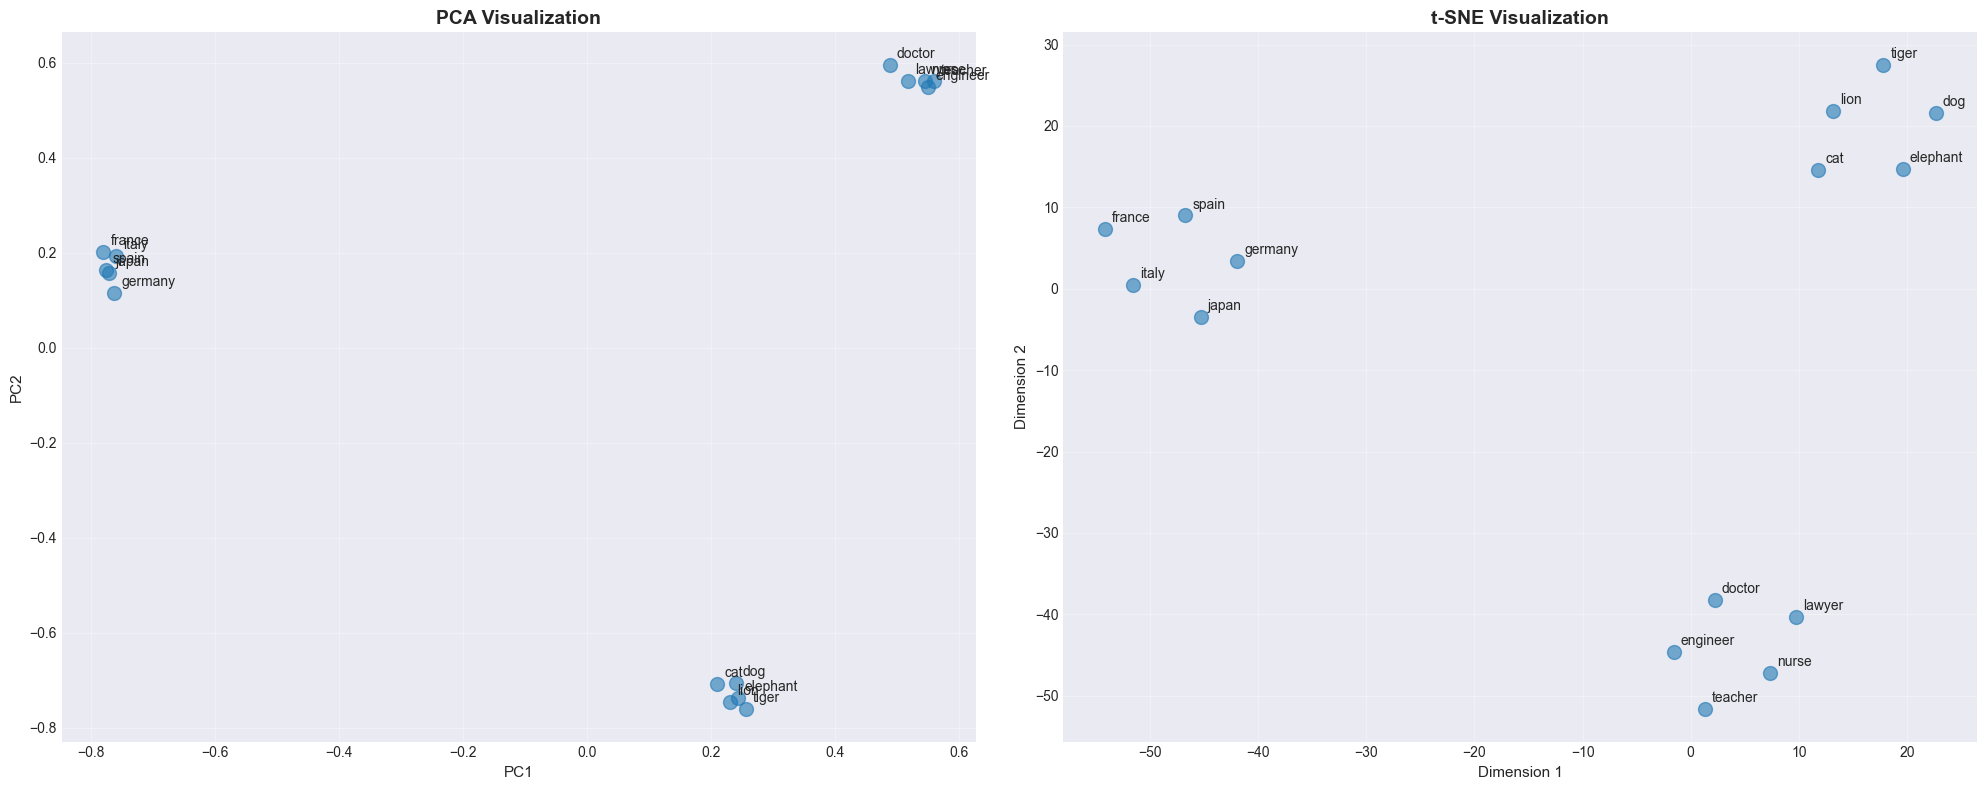

In [18]:

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import inspect

# Create side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Select a subset for clearer visualization
subset_categories = {
    'animals': semantic_groups['animals'][:5],
    'countries': semantic_groups['countries'][:5],
    'professions': semantic_groups['professions'][:5]
}

subset_words = []
for cat_words in subset_categories.values():
    subset_words.extend(cat_words)

subset_embeddings = np.array([embeddings_dict[w] for w in subset_words])

# --- PCA visualization ---
pca = PCA(n_components=2, random_state=42)
coords_pca = pca.fit_transform(subset_embeddings)

axes[0].scatter(coords_pca[:, 0], coords_pca[:, 1], s=100, alpha=0.6)
for i, word in enumerate(subset_words):
    axes[0].annotate(word, (coords_pca[i, 0], coords_pca[i, 1]),
                    fontsize=10, xytext=(5, 5), textcoords='offset points')

axes[0].set_title('PCA Visualization', fontsize=14, fontweight='bold')
axes[0].set_xlabel('PC1', fontsize=11)
axes[0].set_ylabel('PC2', fontsize=11)
axes[0].grid(True, alpha=0.3)

# --- t-SNE visualization (version-safe) ---
tsne_params = {
    'n_components': 2,
    'perplexity': 5,
    'random_state': 42
}

# Detect whether to use `max_iter` (new sklearn) or `n_iter` (old sklearn)
if 'max_iter' in inspect.signature(TSNE).parameters:
    tsne_params['max_iter'] = 1000
else:
    tsne_params['n_iter'] = 1000

tsne = TSNE(**tsne_params)
coords_tsne = tsne.fit_transform(subset_embeddings)

axes[1].scatter(coords_tsne[:, 0], coords_tsne[:, 1], s=100, alpha=0.6)
for i, word in enumerate(subset_words):
    axes[1].annotate(word, (coords_tsne[i, 0], coords_tsne[i, 1]),
                    fontsize=10, xytext=(5, 5), textcoords='offset points')

axes[1].set_title('t-SNE Visualization', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Dimension 1', fontsize=11)
axes[1].set_ylabel('Dimension 2', fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Key Takeaways

### PCA:
- **Pros**: Fast, deterministic, preserves global structure
- **Cons**: Linear transformation may miss non-linear patterns
- **Best for**: Quick exploration, large datasets, when global structure matters

### t-SNE:
- **Pros**: Better at revealing clusters, preserves local structure
- **Cons**: Slower, non-deterministic, sensitive to hyperparameters
- **Best for**: Final visualizations, when local neighborhoods are important

### Embedding Quality:
Good word embeddings should:
1. Place semantically similar words close together
2. Separate different semantic categories
3. Capture analogical relationships through vector arithmetic
4. Show consistent similarity patterns

## 11. Exercise: Experiment with Your Own Embeddings

Try the following:
1. Load embeddings from your trained Word2Vec or GloVe model
2. Choose interesting word sets to visualize
3. Experiment with different perplexity values in t-SNE
4. Find and visualize analogies in your embeddings
5. Compare embeddings from different training approaches

In [ ]:
# Your experiments here
# TODO: Load your trained embeddings and explore them

# Example:
# my_embeddings = Word2VecModel.load('path/to/model.pkl')
# my_words = list(my_embeddings.word_vectors.keys())[:100]
# my_embedding_array = np.array([my_embeddings.word_vectors[w] for w in my_words])
# plot_embeddings_2d(my_embedding_array, my_words, method='tsne')

## Conclusion

In this notebook, we explored:
- Multiple techniques for visualizing high-dimensional word embeddings
- How to interpret semantic relationships in embedding space
- Comparison between PCA and t-SNE visualization methods
- Analysis of word similarities and analogies

**Next Steps:**
- Move on to `similarity_analogies_eval.ipynb` for quantitative evaluation
- Train your own embeddings and visualize them
- Explore more advanced visualization techniques (UMAP, 3D plots)
- Analyze domain-specific embeddings (medical, legal, etc.)